Author: Chris J. Dallmann \
Affiliation: University of Wuerzburg \
Last revision: 04-January-2026

In [63]:
# Import libraries
import pandas as pd
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
# Set parameters
data_dir = r'../data/'
sampling_rate = 150 # Hz

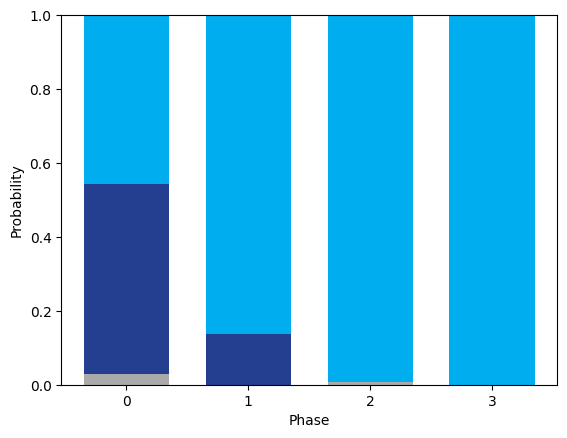

In [73]:
# Plot probability of behavior per phase
dataset = 'gap_rrn_cschrimson.csv'

# Load data
df = pd.read_csv(data_dir+dataset) 

# Initialize variables
behaviors = ['none','cross','turn','backward','fall']
phases = [0,1,2,3]
counts = np.zeros((len(behaviors),len(phases)))
colors = [[0/255,0/255,0/255],
          [0/255,173/255,238/255], 
          [36/255,62/255,144/255],
          [191/255,0/255,191/255],
          [170/255,170/255,170/255]]

# Compute probability 
for phase_index, phase in enumerate(phases):
    df_sub = df[(df["phase"] == phase) & df["behavior"].isin(behaviors)] 
    phase_counts = df_sub.value_counts("behavior", normalize=True).sort_index()
    keys = phase_counts.index.tolist()
    
    for key in keys:
        counts[behaviors.index(key), phase_index] = phase_counts[key]   

# Flip data for plotting
counts = np.flipud(counts)
colors = np.flipud(colors)

# Plot probability
fig, ax = plt.subplots()
for phase in range(counts.shape[1]):
    bottom = 0
    for behavior in range(counts.shape[0]):
        p = ax.bar(phase, counts[behavior, phase], bottom=bottom, width=0.7, label=f"label {behavior}", color=colors[behavior])
        bottom += counts[behavior, phase]
plt.xticks([0,1,2,3])
plt.ylabel('Probability')
plt.xlabel('Phase')
plt.show()

# Flip data back
counts = np.flipud(counts)

In [72]:
# Compute mean probability to cross during phases 1-3
np.mean(counts[1][1:])

np.float64(0.9511739856567442)

In [62]:
# Display specific probability
phase = 3 # 0, 1, 2, 3
behavior = 4 # 0 (none/rest), 1 (cross), 2 (turn away), 3 (backward), 4 (fall) 
counts[behavior][phase]*2

np.float64(0.1282051282051282)

In [20]:
# Get sample size
phase = 3 # 0, 1, 2, 3

df_sub = df[(df["phase"] == phase) & df["behavior"].isin(behaviors)] 
print('N = ' + str(len(df_sub["animal_id"].unique().tolist())))
print('n (total) = ' + str(df_sub["animal_id"].value_counts().sum()))

df_sub["animal_id"].value_counts()

N = 11
n (total) = 35


animal_id
13    9
8     5
1     3
10    3
4     3
9     3
3     2
11    2
7     2
12    2
2     1
Name: count, dtype: int64

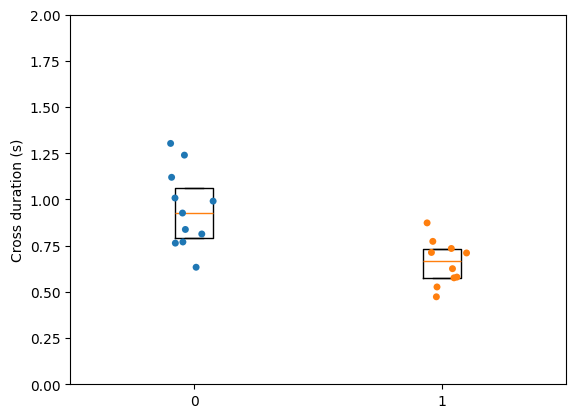

MannwhitneyuResult(statistic=np.float64(11.0), pvalue=np.float64(0.0021899994345199467))

In [79]:
# Plot cross duration 
per_trial = False
min_n_trials = 0 # 3

# Load data
dataset = 'gap_empty_cschrimson.csv'
df_ctrl = pd.read_csv(data_dir+dataset)
df_ctrl = df_ctrl.dropna(subset=["cross_start"])
animal_ids_to_include = df_ctrl['animal_id'].value_counts().loc[lambda x: x >= min_n_trials].index
df_ctrl = df_ctrl[df_ctrl.animal_id.isin(animal_ids_to_include)]

dataset = 'gap_rrn_cschrimson.csv'
df_rrn = pd.read_csv(data_dir+dataset)
df_rrn = df_rrn.dropna(subset=["cross_start"])
animal_ids_to_include = df_rrn['animal_id'].value_counts().loc[lambda x: x >= min_n_trials].index
df_rrn = df_rrn[df_rrn.animal_id.isin(animal_ids_to_include)]

# Initialize variables
cross_duration_ctrl = []
cross_duration_rrn = []
n_events_ctrl = []
n_events_rrn = []

if per_trial:
    # Compute cross duration per trial
    cross_duration_ctrl = (df_ctrl["cross_end"] - df_ctrl["cross_start"]) / sampling_rate
    cross_duration_ctrl = cross_duration_ctrl.tolist()
    
    cross_duration_rrn = (df_rrn["cross_end"] - df_rrn["cross_start"]) / sampling_rate
    cross_duration_rrn = cross_duration_RRN.tolist()

else:
    # Compute mean cross duration per animal 
    animal_ids = df_ctrl.animal_id.unique().tolist()
    for animal_id in animal_ids:
        df_sub = df_ctrl[df_ctrl.animal_id==animal_id]
        cross_duration = (df_sub["cross_end"] - df_sub["cross_start"]) / sampling_rate
        cross_duration_ctrl.append(np.mean(cross_duration)) 
        n_events_ctrl.append(len(cross_duration))
        
    animal_ids = df_rrn.animal_id.unique().tolist()
    for animal_id in animal_ids:
        df_sub = df_rrn[df_rrn.animal_id==animal_id]
        cross_duration = (df_sub["cross_end"] - df_sub["cross_start"]) / sampling_rate
        cross_duration_rrn.append(np.mean(cross_duration)) 
        n_events_rrn.append(len(cross_duration))

# Plot  
plt.boxplot([cross_duration_ctrl, cross_duration_rrn], positions=[0,1], showfliers=False, whis=0)
sns.stripplot([cross_duration_ctrl, cross_duration_rrn])
plt.ylim([0,2])
plt.ylabel('Cross duration (s)')
plt.show()

# Test for normality 
#scipy.stats.normaltest(cross_duration_RRN)

# Mann-Whitney U test for non-normally distributed (nonparametric) data
scipy.stats.mannwhitneyu(cross_duration_rrn, cross_duration_ctrl)

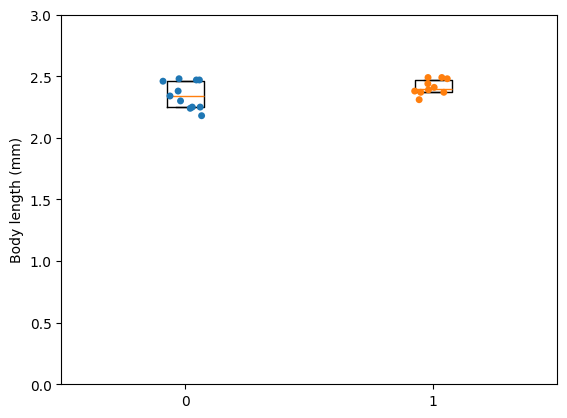

MannwhitneyuResult(statistic=np.float64(33.0), pvalue=np.float64(0.1292812360557783))

In [82]:
# Plot body lengths
# Consider only animals that contributed data to the cross duration analysis above

# Load data 
dataset = 'gap_empty_cschrimson.csv'
df_ctrl = pd.read_csv(data_dir+dataset)
df_ctrl = df_ctrl.dropna(subset=["cross_start"])
df_ctrl = df_ctrl[['animal_id', 'body_length']].drop_duplicates()
length_ctrl = df_ctrl.body_length.tolist()

dataset = 'gap_rrn_cschrimson.csv'
df_rrn = pd.read_csv(data_dir+dataset)
df_rrn = df_rrn.dropna(subset=["cross_start"])
df_rrn = df_rrn[['animal_id', 'body_length']].drop_duplicates()
length_rrn = df_rrn.body_length.tolist()

# Plot length 
plt.boxplot([length_ctrl, length_rrn], positions=[0,1], showfliers=False, whis=0)
sns.stripplot([length_ctrl, length_rrn])
plt.ylabel('Body length (mm)')
plt.ylim([0,3])
plt.show()

# Mann-Whitney U test for non-normally distributed (nonparametric) data
scipy.stats.mannwhitneyu(length_ctrl,length_rrn)

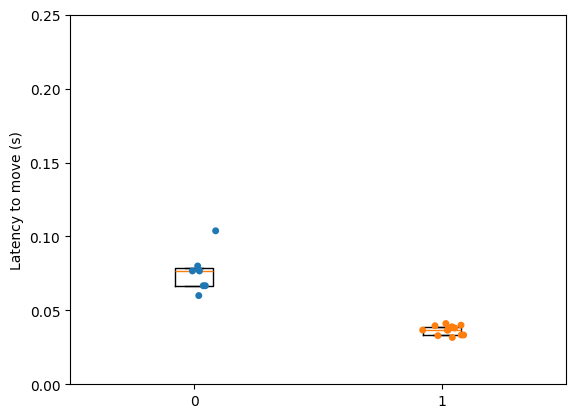

MannwhitneyuResult(statistic=np.float64(104.0), pvalue=np.float64(0.0001853641055165196))

In [84]:
# Plot latency to move
per_trial = False
min_n_trials = 0 # 3

# Load data 
dataset = 'gap_rrn_cschrimson.csv'
df_rrn = pd.read_csv(data_dir+dataset)
df_rrn = df_rrn.dropna(subset=["movement_onset"])
animal_ids_to_include = df_rr['animal_id'].value_counts().loc[lambda x: x >= min_n_trials].index
df_rrn = df_rrn[df_rrn.animal_id.isin(animal_ids_to_include)]

dataset = 'gap_mdn_cschrimson.csv'
df_mdn = pd.read_csv(data_dir+dataset)
df_mdn = df_mdn.dropna(subset=["movement_onset"])
animal_ids_to_include = df_mdn['animal_id'].value_counts().loc[lambda x: x >= min_n_trials].index
df_mdn = df_mdn[df_mdn.animal_id.isin(animal_ids_to_include)]

# Initialize variables
latency_to_move_rrn = []
latency_to_move_mdn = []
n_events_rrn = []
n_events_mdn = []

if per_trial:
    # Compute latency per trial
    latency_to_move_rrn = (df_rr["movement_onset"] - df_rrn["stimulus_onset"]) / sampling_rate
    latency_to_move_rrn = latency_to_move_rrn.tolist()

    latency_to_move_mdn = (df_mdn["movement_onset"] - df_mdn["stimulus_onset"]) / sampling_rate
    latency_to_move_mdn = latency_to_move_mdn.tolist()

else:
    # Compute mean latency per animal 
    animal_ids = df_rrn.animal_id.unique().tolist()
    for animal_id in animal_ids:
        df_sub = df_rrn[df_rrn.animal_id==animal_id]
        latencies = (df_sub["movement_onset"] - df_sub["stimulus_onset"]) / sampling_rate
        latency_to_move_rrn.append(np.mean(latencies)) 
        n_events_rrn.append(len(latencies))
            
    animal_ids = df_mdn.animal_id.unique().tolist()
    for animal_id in animal_ids:
        df_sub = df_mdn[df_mdn.animal_id==animal_id]
        latencies = (df_sub["movement_onset"] - df_sub["stimulus_onset"]) / sampling_rate
        latency_to_move_mdn.append(np.mean(latencies)) 
        n_events_mdn.append(len(latencies))

# Plot latency 
plt.boxplot([latency_to_move_rrn, latency_to_move_mdn], positions=[0,1], showfliers=False, whis=0)
sns.stripplot([latency_to_move_rrn, latency_to_move_mdn])
plt.ylabel('Latency to move (s)')
plt.ylim([0,0.25])
plt.show()

# Mann-Whitney U test for non-normally distributed (nonparametric) data
scipy.stats.mannwhitneyu(latency_to_move_rrn,latency_to_move_mdn)